##### Importing Necessary Packages

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

##### Loading the Dataset

In [5]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_25196\1502387084.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


In [6]:
data['HasClaim'] = data['TotalClaims'] > 0

In [8]:
data['HasClaim'].head()

0    False
1    False
2    False
3    False
4    False
Name: HasClaim, dtype: bool

In [11]:
data['Margin'] = data['TotalPremium'] - data['TotalClaims']

In [13]:
data['Margin'].head()

0     21.929825
1     21.929825
2      0.000000
3    512.848070
4      0.000000
Name: Margin, dtype: float64

In [14]:
claim_data = data[data['HasClaim'] == True]

In [16]:
claim_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,HasClaim,Margin
203,46222,4044,2014-10-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,2294.096491,True,-2294.096491
284,82062,7174,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,2040.473684,True,-2018.543860
1560,119591,8672,2015-04-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1213.889211,46492.211754,True,-45278.322544
1779,50193,283,2014-10-01 00:00:00,False,,Close Corporation,Mr,English,Standard Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,645.017456,26516.859649,True,-25871.842193
1943,119582,8672,2015-04-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Income Protector,Income Protector,Optional Extended Covers,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,74.561404,6140.350877,True,-6065.789474


In [19]:
data.to_csv('../data/processed_data.csv', index=False)

##### Claim Frequency (Chi-squared test)

In [21]:
contingency_table = pd.crosstab(data['Province'], data['HasClaim'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Claim Frequency across Provinces: p-value = {p:.4f}")

Claim Frequency across Provinces: p-value = 0.0000


##### Claim Severity (Kruskal-Wallis test)

In [23]:
provinces = claim_data['Province'].unique()
severity_groups = [claim_data[claim_data['Province'] == p]['TotalClaims'] for p in provinces]
stat, p = kruskal(*severity_groups)
print(f"Claim Severity across Provinces: p-value = {p:.4f}")

Claim Severity across Provinces: p-value = 0.0000


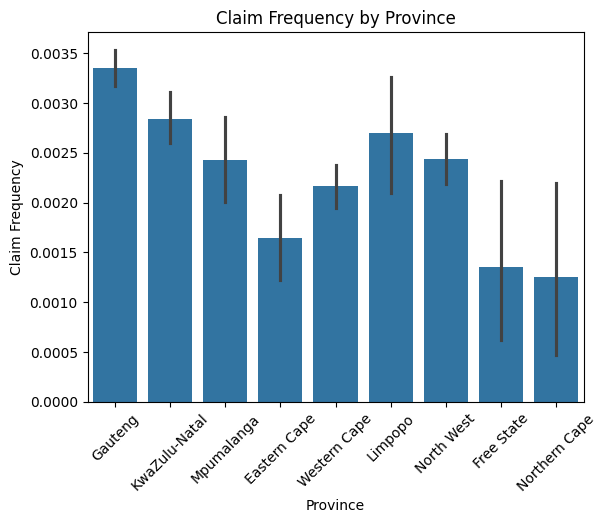

In [25]:
sns.barplot(x='Province', y='HasClaim', data=data, estimator=lambda x: sum(x)/len(x))
plt.title('Claim Frequency by Province')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.savefig('../plots/claim_frequency_province.png')
plt.show()

##### Hypothesis 2: No Risk Differences Between Zip Codes

In [27]:
top_zips = data['PostalCode'].value_counts().head(10).index
data_zip_subset = data[data['PostalCode'].isin(top_zips)]

In [29]:
data_zip_subset.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,HasClaim,Margin
478,55943,5224,2014-09-01 00:00:00,False,,Individual,Dr,English,First National Bank,Current account,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.932544,0.0,False,0.932544
479,55943,5224,2014-11-01 00:00:00,False,,Individual,Dr,English,First National Bank,Current account,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.932544,0.0,False,0.932544
480,55943,5224,2015-01-01 00:00:00,False,,Individual,Dr,English,First National Bank,Current account,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.932544,0.0,False,0.932544
481,55943,5224,2015-04-01 00:00:00,False,,Individual,Dr,English,First National Bank,Current account,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.932544,0.0,False,0.932544
482,55943,5224,2015-06-01 00:00:00,False,,Individual,Dr,English,First National Bank,Current account,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,False,0.000000


##### Claim Frequency (Chi-squared test)

In [30]:
contingency_table = pd.crosstab(data_zip_subset['PostalCode'], data_zip_subset['HasClaim'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Claim Frequency across Zip Codes: p-value = {p:.4f}")

Claim Frequency across Zip Codes: p-value = 0.0000


##### Claim Severity (Kruskal-Wallis test)

In [31]:
zip_groups = [claim_data[claim_data['PostalCode'] == z]['TotalClaims'] for z in top_zips]
stat, p = kruskal(*zip_groups)
print(f"Claim Severity across Zip Codes: p-value = {p:.4f}")

Claim Severity across Zip Codes: p-value = 0.0000


##### Hypothesis 3: No Significant Margin Difference Between Zip Codes

##### Margin (Kruskal-Wallis test)

In [32]:
margin_groups = [data[data['PostalCode'] == z]['Margin'] for z in top_zips]
stat, p = kruskal(*margin_groups)
print(f"Margin across Zip Codes: p-value = {p:.4f}")

Margin across Zip Codes: p-value = 0.0000


##### Visualization

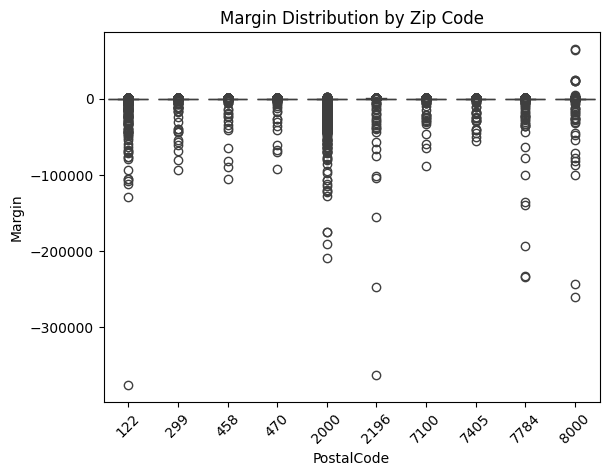

In [33]:
sns.boxplot(x='PostalCode', y='Margin', data=data_zip_subset)
plt.title('Margin Distribution by Zip Code')
plt.xticks(rotation=45)
plt.savefig('../plots/margin_zipcode.png')
plt.show()

##### Hypothesis 4: No Significant Risk Difference Between Women and Men

In [34]:
data_gender = data[data['Gender'].isin(['Male', 'Female'])]
claim_data_gender = claim_data[claim_data['Gender'].isin(['Male', 'Female'])]

In [36]:
claim_data_gender.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,HasClaim,Margin
28632,47539,3878,2015-02-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,74.561404,3508.771930,True,-3434.210526
28641,1514,174,2014-03-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,15.789474,2968.705263,True,-2952.915789
28867,126029,6641,2015-02-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,74.561404,6140.350877,True,-6065.789474
28878,92064,6641,2015-01-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,395.529123,36298.298246,True,-35902.769123
30907,92064,6641,2015-05-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,395.529123,11927.254386,True,-11531.725263


##### Claim Frequency (Chi-squared test)

In [37]:
contingency_table = pd.crosstab(data_gender['Gender'], data_gender['HasClaim'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Claim Frequency by Gender: p-value = {p:.4f}")

Claim Frequency by Gender: p-value = 0.9515


##### Claim Severity (Mann-Whitney U test)

In [40]:
male_claims = claim_data_gender[claim_data_gender['Gender'] == 'Male']['TotalClaims']
female_claims = claim_data_gender[claim_data_gender['Gender'] == 'Female']['TotalClaims']
stat, p = mannwhitneyu(male_claims, female_claims)
print(f"Claim Severity by Gender: p-value = {p:.4f}")

Claim Severity by Gender: p-value = 0.2235


##### Visualization

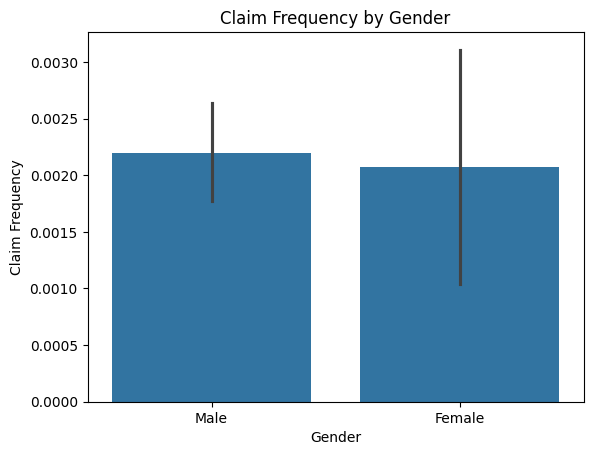

In [41]:
sns.barplot(x='Gender', y='HasClaim', data=data_gender, estimator=lambda x: sum(x)/len(x))
plt.title('Claim Frequency by Gender')
plt.ylabel('Claim Frequency')
plt.savefig('../plots/claim_frequency_gender.png')
plt.show()